<a href="https://colab.research.google.com/github/dimashaheen/Spectral-Cluster-implemtation/blob/main/Final_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import eig
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
from numpy import linalg

In [ ]:
pts = []
with open('SpectData.txt', "r") as file:
    for readline in file:
        line_strip = readline.strip() 
        point = line_strip.split('\t') 
        pts.append(point)
data = np.array(pts)   
data=data.astype(float)
data

array([[ 9.8323  , -0.1749  ],
       [ 9.792   , -0.045816],
       [10.535   ,  0.70435 ],
       ...,
       [11.2     ,  0.08    ],
       [11.2     ,  0.09    ],
       [11.2     ,  0.1     ]])

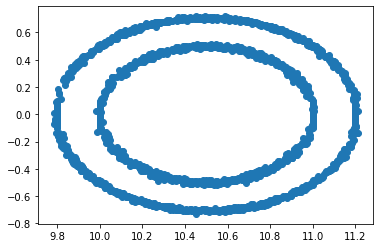

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
#accurate labels
#get mean as coordinates
xmean= data[:,0].mean()
ymean= data[:,1].mean()
mean=[]
mean.append(xmean)
mean.append(ymean)
mean=np.array(mean)

#calculate distance between points an mean assign data labels
labelAccurate=np.zeros(2084)
for i in range (0,len(data)):
  dist = np.linalg.norm(data[i,:]-mean)
  if(dist<0.55):
    labelAccurate[i]=0
  else:
    labelAccurate[i]=1
labelAccurate
print(mean)

[10.49971742 -0.01608767]


#Spectral Clustering data1

In [ ]:
sigma=np.arange(0.01,1.01,0.01)

In [ ]:
#D and W matrix
def weight(data1, data2, si):
    wij = math.exp(-linalg.norm(data1-data2)**2/(2*(si**2)))
    return wij
     
def buildLMatrix(dataN,s):
    nData = 2084
    wMat = np.zeros((2084,2084))
    for i in range(0,nData):
        for j in range(0, nData):
            wij = weight(dataN[i, :], dataN[j, :], sigma[s])
            wMat[i][j] = wij

        diag = np.array(wMat.sum(axis=1)).ravel()
        dMat = np.diag(diag)  
    #to get lMat       
    lMat = dMat - wMat
    return lMat

In [ ]:
def accuracy(dataI,s):
    #create matrix
    lMat = buildLMatrix(dataI,s)
    #get eigenvalue and eigenvector
    value,vector=eig(lMat)
    smallest=max(value)
    sec_smallest=max(value)
    Eigen=np.zeros(len(value))
    x=0 
    y=0
    for i in range(value.size):
        if(value[i]<smallest):
            x=y
            sec_smallest=smallest
            smallest=value[i]
            y=i
        elif(value[i]<sec_smallest):
            sec_smallest=value[i]
            x=i
    for i in range(len(value)):
        Eigen[i]=vector[i][x]

    #labels for spectral
    spec_labels=np.zeros(2084)

    for i in range(0,2084):
        if (Eigen[i]<0):
            spec_labels[i]=0
        else:
            spec_labels[i]=1
    Acc=accuracy_score(labelAccurate,spec_labels)
    print(Acc)
    return Acc

In [ ]:
accuracies=np.zeros(100)
for i in range(0,100):
    accuracies[i]=accuracy(data,i)

0.41554702495201534
0.5844529750479847
1.0
0.0
1.0
0.5115163147792706
0.4894433781190019
0.5076775431861804
0.5067178502879078
0.5057581573896354
0.494721689059501
0.4952015355086372
0.4952015355086372
0.4952015355086372
0.5047984644913628
0.4956813819577735
0.4956813819577735
0.4961612284069098
0.4961612284069098
0.4961612284069098
0.4961612284069098
0.4961612284069098
0.4961612284069098
0.4961612284069098
0.5038387715930902
0.4961612284069098
0.4961612284069098
0.5038387715930902
0.5038387715930902
0.5038387715930902
0.5038387715930902
0.5038387715930902
0.5043186180422264
0.5043186180422264
0.5043186180422264
0.5043186180422264
0.5043186180422264
0.5047984644913628
0.5047984644913628
0.5047984644913628
0.5047984644913628
0.5047984644913628
0.5043186180422264
0.5043186180422264
0.5043186180422264
0.4956813819577735
0.4956813819577735
0.5043186180422264
0.4952015355086372
0.505278310940499
0.5047984644913628
0.5047984644913628
0.5047984644913628
0.5043186180422264
0.5043186180422264
0

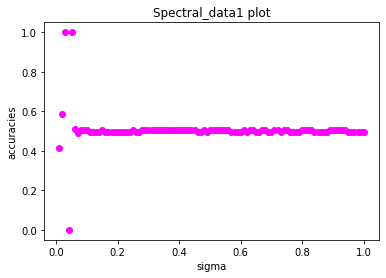

In [ ]:
plt.scatter(sigma,accuracies,c='magenta')
plt.title('Spectral_data1 plot')
plt.xlabel("sigma")
plt.ylabel("accuracies")
plt.show()

#Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans
kMeans=KMeans(n_clusters=2,init='k-means++')
ykMeans=kMeans.fit_predict(data)
ykMeans

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

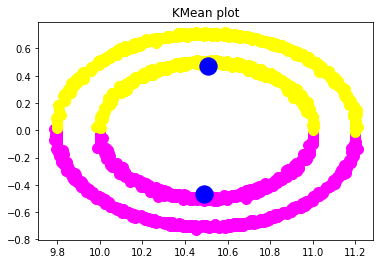

In [ ]:
plt.scatter(data[ykMeans==0,0],data[ykMeans==0,1],s=100,c='magenta',label='Cluster1')
plt.scatter(data[ykMeans==1,0],data[ykMeans==1,1],s=100,c='yellow',label='Cluster2')
plt.scatter(kMeans.cluster_centers_[:,0],kMeans.cluster_centers_[:,1],s=300,c='blue',label='Centroids')
plt.title('KMean plot')
plt.show()

#Spectral Clustering Data2


In [ ]:
pts = []
with open('SpectData2.txt', "r") as file:
    for readline in file:
        line_strip = readline.strip() 
        point = line_strip.split('\t') 
        pts.append(point)
data2 = np.array(pts)   
data2=data2.astype(float)
data2

array([[10.484  ,  0.49595],
       [10.391  ,  1.001  ],
       [10.034  , -0.20092],
       ...,
       [11.5    ,  0.08   ],
       [11.5    ,  0.09   ],
       [11.5    ,  0.1    ]])

In [ ]:
accuraciesSpec2=np.zeros(100)
for i in range(0,100):
    accuraciesSpec2[i]=accuracy(data2,i)

0.5460652591170825
0.5460652591170825
0.5844529750479847
0.5844529750479847
0.45393474088291746
0.45393474088291746
0.5460652591170825
0.45393474088291746
0.5460652591170825
0.45393474088291746
0.45393474088291746
0.45393474088291746
0.45393474088291746
0.5110364683301344
0.494721689059501
0.5028790786948176
0.4985604606525912
0.4990403071017274
0.4985604606525912
0.4985604606525912
0.4985604606525912
0.4985604606525912
0.4980806142034549
0.5019193857965452
0.5014395393474088
0.4976007677543186
0.5023992322456814
0.4966410748560461
0.503358925143954
0.503358925143954
0.4966410748560461
0.503358925143954
0.5028790786948176
0.503358925143954
0.503358925143954
0.503358925143954
0.503358925143954
0.4961612284069098
0.5038387715930902
0.503358925143954
0.4966410748560461
0.4966410748560461
0.5038387715930902
0.4961612284069098
0.5038387715930902
0.4961612284069098
0.503358925143954
0.503358925143954
0.5028790786948176
0.5028790786948176
0.5028790786948176
0.5028790786948176
0.50287907869481

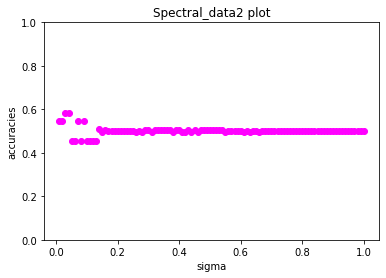

In [ ]:
plt.scatter(sigma,accuraciesSpec2,c='magenta')
plt.ylim(0,1)
plt.title('Spectral_data2 plot')
plt.xlabel("sigma")
plt.ylabel("accuracies")
plt.show()